# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Filter study_results for Timepoint 0

# Merge with mouse_metadata
combined_mouse_data = study_results.merge(mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = combined_mouse_data['Mouse ID'].nunique()
print(f"Total mice: {total_mice}")


Total mice: 249


In [3]:
# # Our data should be uniquely identified by Mouse ID and Timepoint
# # Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Display the duplicate mice
duplicates_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the combined data to get all rows for the duplicate mouse ID(s)
mouse_g989_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID'] == 'g989']

# Display the data
mouse_g989_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID'] != 'g989']
cleaned_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
total_unique_mice_count = cleaned_mouse_data['Mouse ID'].nunique()

print(f"total mice after cleaning are: {total_unique_mice_count}")


total mice after cleaning are: 248


## Summary Statistics

In [34]:
# Group by the drug regimen
grouped_data = cleaned_mouse_data.groupby('Drug Regimen')

# Calculate the required statistics
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the series into a DataFrame
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Display the summary DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [7]:
summary_statistics = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

summary_statistics


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

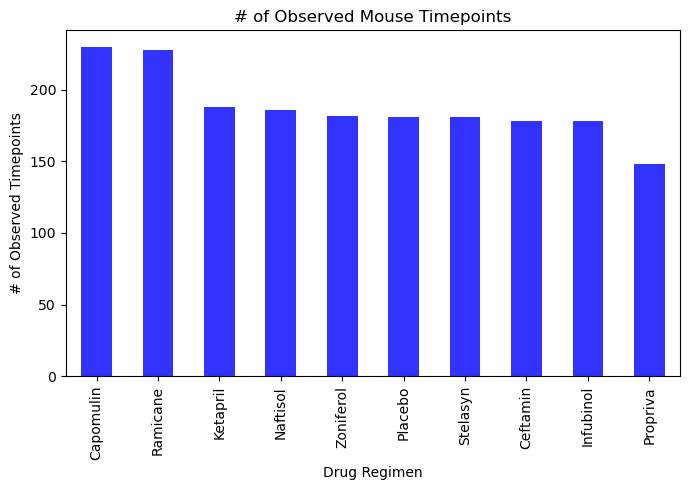

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by 'Drug Regimen' and count the number of rows
bar_data = cleaned_mouse_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Plot using Pandas, control transparency, width and height
bar_data.plot(kind='bar', color='blue', alpha=0.8, figsize=(7,5))

# Set the title and labels
plt.title('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.tight_layout()

# Display the bar plot
plt.show()


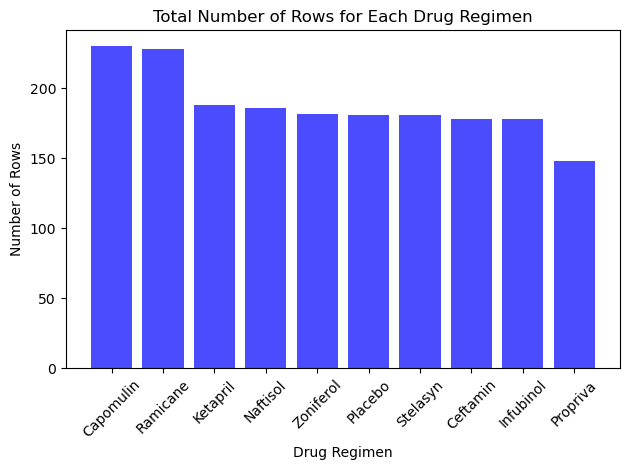

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Group by 'Drug Regimen' and count the number of rows
drug_counts = cleaned_mouse_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Extract the drug names and the counts
drugs = drug_counts.index
counts = drug_counts.values

# Create a bar plot using pyplot
plt.bar(drugs, counts, color='blue', alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate drug names for better reading

# Display the plot
plt.tight_layout()
plt.show()


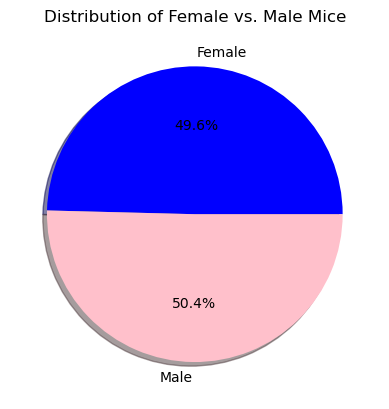

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by 'Sex' and count the number of unique Mouse IDs 
sex_distribution = cleaned_mouse_data.groupby('Sex')['Mouse ID'].nunique()

# Plot using Pandas
colors = ['blue', 'pink']
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors, shadow=True, ylabel='')

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the pie plot
plt.show()


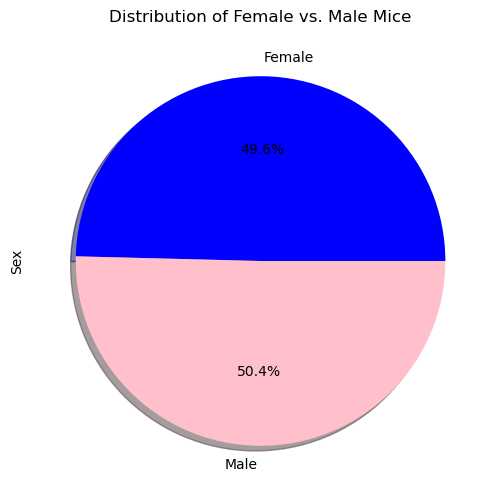

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by 'Sex' and count the number of unique Mouse IDs 
sex_distribution = cleaned_mouse_data.groupby('Sex')['Mouse ID'].nunique()

# Labels for the sections of our pie chart
labels = sex_distribution.index

# Values for each section
sizes = sex_distribution.values

# Colors for each section
colors = ['blue', 'pink']

# Plot using Pyplot
plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, shadow=True)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')

# Display the pie plot
plt.show()


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# List of the four treatment regimens
four_treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the cleaned_mouse_data to only include the four treatment regimens
filtered_data = cleaned_mouse_data[cleaned_mouse_data["Drug Regimen"].isin(four_treatment_list)]

# Group by mouse ID and use the `max()` function to find the last timepoint for each mouse
last_timepoints = filtered_data.groupby(["Mouse ID"])["Timepoint"].max()

# Reset the index of the resulting Series to obtain a DataFrame
last_timepoints = last_timepoints.reset_index()

# Merge the filtered_data dataframe with the last_timepoints dataframe 
# to get the tumor volume at the last timepoint for each mouse
final_tumor_volume = pd.merge(last_timepoints, cleaned_mouse_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the resulting dataframe
final_tumor_volume[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]].head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
5,a520,45,38.810366,Ramicane
6,a577,30,57.031862,Infubinol
7,a644,45,32.978522,Ramicane
8,a685,45,66.083066,Infubinol
9,b128,45,38.982878,Capomulin


In [27]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Merge last_timepoints with cleaned_mouse_data
merged_data = pd.merge(last_timepoints, cleaned_mouse_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the resulting dataframe with the tumor volume at the last timepoint
merged_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Add subset
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Locate the outliers for each treatment
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


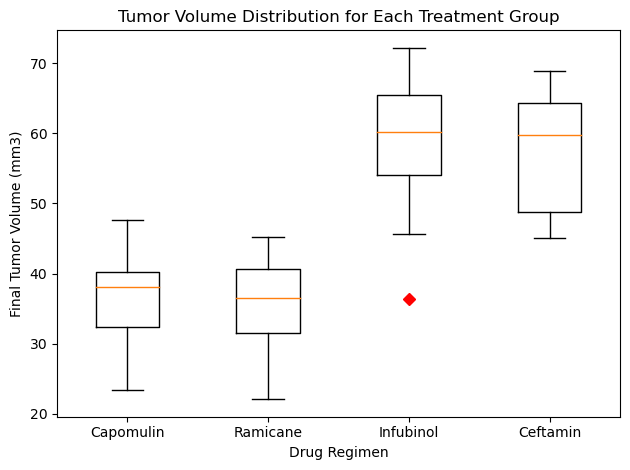

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Set up the properties for the box plot
fig, ax = plt.subplots()
ax.set_title('Tumor Volume Distribution for Each Treatment Group')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Create the box plot
ax.boxplot(tumor_vol_data, labels=treatments, sym='rD')  # 'rD' will mark the outliers with a red diamond

# Display the box plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

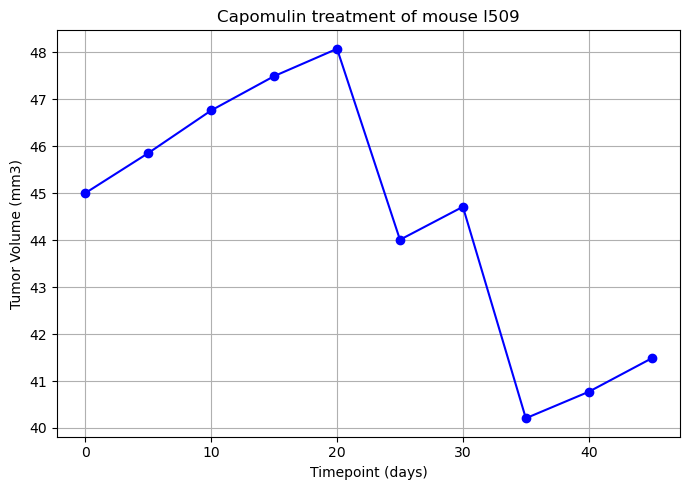

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Selecting a single mouse data (replace 'Mouse_ID' with the specific mouse's ID you want to examine, for example 'l509')
mouse_id = 'l509'
l509_data = cleaned_mouse_data[(cleaned_mouse_data['Drug Regimen'] == 'Capomulin') & 
                                      (cleaned_mouse_data['Mouse ID'] == mouse_id)]

# Plotting the data
plt.figure(figsize=(7,5))
plt.plot(l509_data['Timepoint'], l509_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()



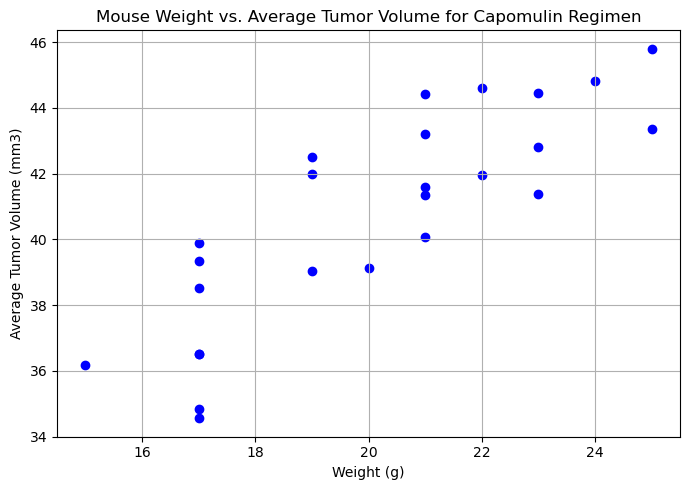

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Filter data for Capomulin regimen
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group by Mouse ID to get average tumor volume and weight for each mouse
grouped_data = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'  # Assuming weight doesn't change, we can simply pick the first observed weight
}).reset_index()

# Step 3: Generate the scatter plot
plt.figure(figsize=(7,5))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


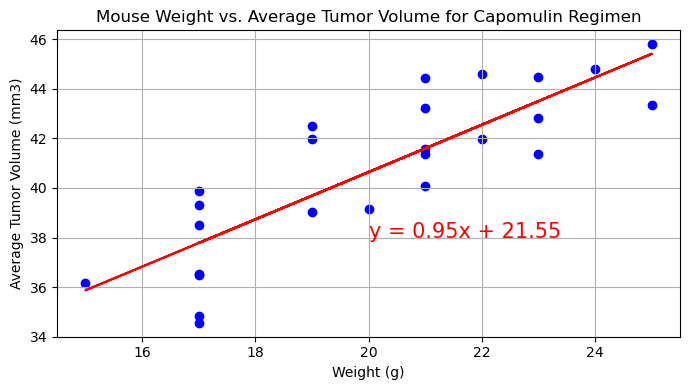

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

# Filter data for Capomulin regimen
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get average tumor volume and weight for each mouse
grouped_data = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'
}).reset_index()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting the scatter plot
plt.figure(figsize=(7,4))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Plotting the linear regression line
regression_values = grouped_data['Weight (g)'] * slope + intercept
plt.plot(grouped_data['Weight (g)'], regression_values, color="red")
plt.annotate(line_eq, (20, 38), fontsize=15, color="red")

plt.tight_layout()
plt.show()
